##Installations

In [ ]:
!pip install deepbrain
!pip install nilearn
!pip uninstall opencv-python
!pip install -U opencv-contrib-python

     |████████████████████████████████| 686kB 5.3MB/s 
     |████████████████████████████████| 4.9MB 5.1MB/s 
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 57.4MB 51kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


##Imports

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
#from nilearn import plotting
import imutils
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import imutils
from nilearn import plotting
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import scipy
import nibabel as nib
from deepbrain import Extractor
import matplotlib.pyplot as plt
import shutil
import sys
import random
import cv2
from torchvision import transforms

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


##PreProcessing

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Skull Stripping using Extractor

In [ ]:


directory = '/content/drive/MyDrive/ADNI/EMCI'

for filename in os.listdir(directory):
  if filename.endswith(".nii"): 
    img_path=directory+"/"+filename
    # Load a nifti as 3d numpy image [H, W, D]
    img = nib.load(img_path).get_fdata()

    ext = Extractor()

    # `prob` will be a 3d numpy image containing probability 
    # of being brain tissue for each of the voxels in `img`
    prob = ext.run(img) 

    # mask can be obtained as:
    mask = prob > 0.5

    img=np.where(mask, img, 0)
    new_image = nib.Nifti1Image(img, affine=np.eye(4))
    new_image.get_data_dtype() == np.dtype(np.int16)
    print("Brain Extracted for image:",os.path.join(directory, filename))
    nib.save(new_image, os.path.join(directory, filename))  
    continue
  else:
    continue

Brain Extracted for image: /content/drive/MyDrive/ADNI/EMCI/ADNI_013_S_2324_MR_MPRAGE_br_raw_20110628170516462_158_S112893_I242257.nii
Brain Extracted for image: /content/drive/MyDrive/ADNI/EMCI/ADNI_019_S_4285_MR_MPRAGE_SENSE2__br_raw_20120501093327796_121_S148758_I301216.nii
Brain Extracted for image: /content/drive/MyDrive/ADNI/EMCI/ADNI_002_S_4799_MR_MPRAGE_SENSE2__br_raw_20140707110711904_4_S224278_I434497.nii
Brain Extracted for image: /content/drive/MyDrive/ADNI/EMCI/ADNI_018_S_4868_MR_MPRAGE_SENSE2__br_raw_20130222123014808_144_S181883_I358607.nii
Brain Extracted for image: /content/drive/MyDrive/ADNI/EMCI/ADNI_012_S_4012_MR_MPRAGE_br_raw_20110721104840784_60_S115587_I246031.nii
Brain Extracted for image: /content/drive/MyDrive/ADNI/EMCI/ADNI_018_S_2133_MR_MPRAGE_SENSE2__br_raw_20110824142736515_36_S120229_I252607.nii
Brain Extracted for image: /content/drive/MyDrive/ADNI/EMCI/ADNI_009_S_2208_MR_MPRAGE_GRAPPA2_br_raw_20131226164150156_128_S209449_I403616.nii
Brain Extracted for

Splitting the MRI scans from Miriad into AD and CN

In [ ]:
directory = '/content/drive/MyDrive/Miriad1'

for filename in os.listdir(directory):
  if 'HC'in filename:
    d1=directory+"/"+filename
    d2="/content/drive/MyDrive/Miriad1/CN/"+filename
    os.rename(d1, d2)
    continue
  else:
    continue

In [ ]:
directory = '/content/drive/MyDrive/Miriad1'

for filename in os.listdir(directory):
  if 'AD'in filename:
    d1=directory+"/"+filename
    d2="/content/drive/MyDrive/Miriad1/AD/"+filename
    os.rename(d1, d2)
    continue
  else:
    continue

Extracting the sagittal, coronal and axial planes

Miriad

In [ ]:


directory='/content/drive/MyDrive/Miriad/AD'

for filename in os.listdir(directory):
  if filename.endswith(".nii"):
    file=directory+"/"+filename 
    name=filename[:-4]
    newpath = '/content/drive/MyDrive/MiriadPics/AD/'+name 
    if not os.path.exists(newpath):
      os.makedirs(newpath)
      anatomy_img = nib.load(file)
      img_numpy = anatomy_img.get_fdata()
      img_numpy=np.asarray(img_numpy)

      n_i, n_j, n_k = img_numpy.shape

      # sagittal
      center_i1 = int((n_i-1) / 2)
      # axial 
      center_j1 = int((n_j-1) / 2)
      # coronal
      center_k1 = int((n_k-1) / 2)

      img_numpy = img_numpy[:,:,:,0]
      cv2.imwrite(newpath+'/'+'x_'+name+'.png', img_numpy[center_i1, :, :])

      cv2.imwrite(newpath+'/'+'y_'+name+'.png', img_numpy[:, center_j1, :])
  
      cv2.imwrite(newpath+'/'+'z_'+name+'.png', img_numpy[:, :, center_k1])

      cv2.waitKey(0)

ADNI

In [ ]:
directory='/content/drive/MyDrive/ADNI/EMCI'

for filename in os.listdir(directory):
  if filename.endswith(".nii"):
    file=directory+"/"+filename 
    name=filename[:-4]
    newpath = '/content/drive/MyDrive/ADNIPics/EMCI/'+name 
    if not os.path.exists(newpath):
      os.makedirs(newpath)
      anatomy_img = nib.load(file)
      img_numpy = anatomy_img.get_fdata()
      img_numpy=np.asarray(img_numpy)

      n_i, n_j, n_k, r = img_numpy.shape

      # saggital
      center_i1 = int((n_i-1) / 2)
      # coronal
      center_j1 = int((n_j-1) / 2)
      # axial 
      center_k1 = int((n_k-1) / 2)

      img_numpy = img_numpy[:,:,:,0]
      
      plt.imsave(newpath+'/'+'x_'+name+'.png',img_numpy[center_i1, :, :],cmap="gray")

      plt.imsave(newpath+'/'+'z_'+name+'.png',img_numpy[:, center_j1, :],cmap="gray")
      
      plt.imsave(newpath+'/'+'y_'+name+'.png',img_numpy[:, :, center_k1],cmap="gray")

Combining Miriad and ADNI AD category

In [ ]:
directory = '/content/drive/MyDrive/ADNIPics/AD'

for filename in os.listdir(directory):
  d1=directory+"/"+filename
  d2="/content/drive/MyDrive/MRIPics/AD/"+filename
  shutil.copytree(d1, d2)

In [ ]:
directory = '/content/drive/MyDrive/MiriadPics/AD'

for filename in os.listdir(directory):
  d1=directory+"/"+filename
  d2="/content/drive/MyDrive/MRIPics/AD/"+filename
  shutil.copytree(d1, d2)

Data Augmention on Miriad CN

In [ ]:
directory = '/content/drive/MyDrive/MiriadPics/CN'

for filename in os.listdir(directory):
  d1=directory+"/"+filename
  d2="/content/drive/MyDrive/MiriadPics/CN/"+'_copy_'+filename
  shutil.copytree(d1, d2)


In [ ]:
directory = '/content/drive/MyDrive/MiriadPics/CN'

for filename in os.listdir(directory):
  if 'copy' in filename:
    file=os.path.join(directory,filename)
    for f in os.listdir(file):
    #plt.figure(figsize=(10, 10))
      ffile=os.path.join(file,f)
      loader_transform = transforms.Compose([
      transforms.RandomRotation(30),
      #transforms.RandomResizedCrop(140),
      transforms.RandomHorizontalFlip()
      ])
      img = PIL.Image.open(ffile)
      img = loader_transform(img)
      #cv2.imwrite(ffile, img)
      plt.imsave(ffile,img,cmap="gray")
      plt.imshow(img, cmap="gray")
      plt.show()

Combining Miriad and ADNI CN category

In [ ]:
directory = '/content/drive/MyDrive/ADNIPics/CN'

for filename in os.listdir(directory):
  d1=directory+"/"+filename
  d2="/content/drive/MyDrive/MRIPics/CN/"+filename
  shutil.copytree(d1, d2)

In [ ]:
directory = '/content/drive/MyDrive/MiriadPics/CN'

for filename in os.listdir(directory):
  d1=directory+"/"+filename
  d2="/content/drive/MyDrive/MRIPics/CN/"+filename
  shutil.copytree(d1, d2)

Combining EMCI and LMCI to create the MCI catergory

In [ ]:
directory = '/content/drive/MyDrive/ADNIPics/EMCI'

for filename in os.listdir(directory):
  d1=directory+"/"+filename
  d2="/content/drive/MyDrive/MRIPics/MCI/"+filename
  shutil.copytree(d1, d2)

In [ ]:
directory = '/content/drive/MyDrive/ADNIPics/LMCI'

for filename in os.listdir(directory):
  d1=directory+"/"+filename
  d2="/content/drive/MyDrive/MRIPics/MCI/"+filename
  shutil.copytree(d1, d2)

Moving EMCI and LMCI into their own direcctory

In [ ]:
import shutil

directory = '/content/drive/MyDrive/ADNIPics/EMCI'

for filename in os.listdir(directory):
  d1=directory+"/"+filename 
  #name=filename[:-4]
  d2='/content/drive/MyDrive/MCIPics/EMCI/'+filename 
  shutil.copytree(d1, d2)

In [ ]:
import shutil

directory = '/content/drive/MyDrive/ADNIPics/LMCI'

for filename in os.listdir(directory):
  d1=directory+"/"+filename 
  #name=filename[:-4]
  d2='/content/drive/MyDrive/MCIPics/LMCI/'+filename 
  shutil.copytree(d1, d2)

##Data Analysis

In [ ]:
directory = '/content/drive/MyDrive/MRIPics/AD'
i=0
for filename in os.listdir(directory):
  i=i+1
print("AD:",i)

directory = '/content/drive/MyDrive/MRIPics/CN'
i=0
for filename in os.listdir(directory):
  i=i+1
print("CN :",i)

directory = '/content/drive/MyDrive/MRIPics/MCI'
i=0
for filename in os.listdir(directory):
  i=i+1
print("MCI:",i)

directory = '/content/drive/MyDrive/MCIPics/EMCI'
i=0
for filename in os.listdir(directory):
  i=i+1
print("EMCI:",i)

directory = '/content/drive/MyDrive/MCIPics/LMCI'
i=0
for filename in os.listdir(directory):
  i=i+1
print("LMCI:",i)

AD: 925
CN : 986
MCI: 1000
EMCI: 500
LMCI: 500


#Plotting


##Figure 1: Views for Disease Classification

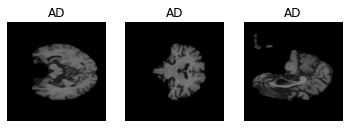

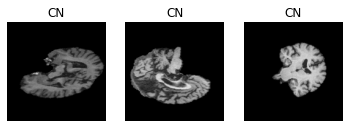

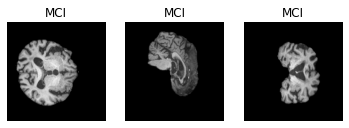

In [ ]:
path='/content/drive/MyDrive/MRIPics/'
width = 160
height = 160
dim = (width, height)


for filename in os.listdir(path):
  folder=os.path.join(path,filename)
  random_file=random.choice(os.listdir(folder))
  file=os.path.join(folder,random_file)
  i=0
  p,axarr=plt.subplots(1,3)
  for f in os.listdir(file):
    
    #plt.figure(figsize=(10, 10))
    ffile=os.path.join(file,f)
    image = cv2.imread(ffile)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    axarr[i].imshow(image)
    axarr[i].set_title(filename)
    
    axarr[i].axis("off")
    i+=1
    #plt.show()




##Figure 2: Views for MCI classification

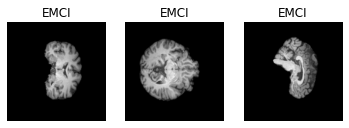

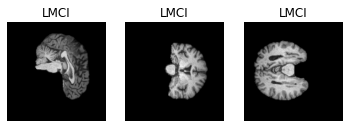

In [ ]:
path='/content/drive/MyDrive/MCIPics/'
width = 160
height = 160
dim = (width, height)


for filename in os.listdir(path):
  folder=os.path.join(path,filename)
  random_file=random.choice(os.listdir(folder))
  file=os.path.join(folder,random_file)
  i=0
  p,axarr=plt.subplots(1,3)
  for f in os.listdir(file):
    
    #plt.figure(figsize=(10, 10))
    ffile=os.path.join(file,f)
    image = cv2.imread(ffile)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    axarr[i].imshow(image)
    axarr[i].set_title(filename)
    
    axarr[i].axis("off")
    i+=1
    #plt.show()

##Figure 3: Features for Disease Classification

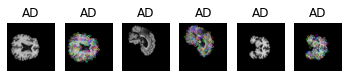

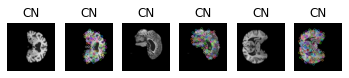

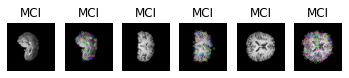

In [ ]:
path='/content/drive/MyDrive/MRIPics/'
width = 160
height = 160
dim = (width, height)


for filename in os.listdir(path):
  folder=os.path.join(path,filename)
  random_file=random.choice(os.listdir(folder))
  file=os.path.join(folder,random_file)
  i=0
  p,axarr=plt.subplots(1,6)
  for f in os.listdir(file):
    
    #plt.figure(figsize=(10, 10))
    ffile=os.path.join(file,f)
    image = cv2.imread(ffile)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #kp = sift.detect(gray,None)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray,None)
    img=cv2.drawKeypoints(gray,kp,image.copy())
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    axarr[i].imshow(image)
    axarr[i].set_title(filename)
    axarr[i].axis("off")
    i+=1
    axarr[i].imshow(img)
    axarr[i].set_title(filename)
    
    axarr[i].axis("off")
    i+=1

##Figure 4: Features for MCI classification

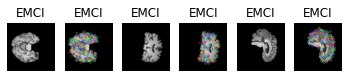

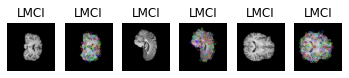

In [ ]:
path='/content/drive/MyDrive/MCIPics/'
width = 160
height = 160
dim = (width, height)


for filename in os.listdir(path):
  folder=os.path.join(path,filename)
  random_file=random.choice(os.listdir(folder))
  file=os.path.join(folder,random_file)
  i=0
  p,axarr=plt.subplots(1,6)
  for f in os.listdir(file):
    
    #plt.figure(figsize=(10, 10))
    ffile=os.path.join(file,f)
    image = cv2.imread(ffile)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #kp = sift.detect(gray,None)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray,None)
    img=cv2.drawKeypoints(gray,kp,image.copy())
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    axarr[i].imshow(image)
    axarr[i].set_title(filename)
    axarr[i].axis("off")
    i+=1
    axarr[i].imshow(img)
    axarr[i].set_title(filename)
    
    axarr[i].axis("off")
    i+=1

#Figure 4: Clusters

In [ ]:
ath='/content/drive/MyDrive/MRIPics/'
width = 160
height = 160
dim = (width, height)


for filename in os.listdir(path):
  folder=os.path.join(path,filename)
  random_file=random.choice(os.listdir(folder))
  file=os.path.join(folder,random_file)
  i=0
  p,axarr=plt.subplots(1,3)
  for f in os.listdir(file):
    
    #plt.figure(figsize=(10, 10))
    ffile=os.path.join(file,f)
    image = cv2.imread(ffile)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #kp = sift.detect(gray,None)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray,None)
    img=cv2.drawKeypoints(gray,kp,image)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    axarr[i].imshow(img)
    axarr[i].set_title(filename)
    
    axarr[i].axis("off")
    i+=1